# Task 3
**Performed by: Kushakov Evgenii, J4132C**

In [37]:
#Import tools
import numpy as np
from math import sqrt
from numpy import asarray, arange
from numpy.random import rand, seed
import matplotlib.pyplot as plt
import statistics

## Exercise 1
Develop yourself using numpy library:

a) python function for implementation of gradient descent (GD) with momentum algorithm for the function of two variables f(x,y).

b) python function for implementation of ADAM optimization algorithm for the function of two variables f(x,y).

In [38]:
#Objective function
def objective(x):
    return x**2.0

# Derivative of objective function
def derivative(x):
	return x * 2.0

### Gradient descent with momentum algorithm

In [39]:
#Gradient descent algorithm
def gradient_descent(objective, derivative, start_solution, n_iter, step_size, momentum):
    solutions = []
    scores = []
    solution = start_solution
    change = 0.0
    for i in range(n_iter):
        gradient = derivative(solution)
        new_change = step_size * gradient + momentum * change
        solution = solution - new_change
        change = new_change
        solution_eval = objective(solution)
        solutions.append(solution)
        scores.append(solution_eval)
        print(f'{i} f({solution[0]}) = {solution_eval[0]}')
    return [solutions, scores]

### ADAM optimization algorithm

In [40]:
#ADAM algorithm
def adam(objective, derivative, start_solution, n_iter, alpha, beta1, beta2, eps = 1e-8):
    solutions = []
    scores = []
    solution = start_solution
    m = [0.0 for _ in range(n_iter)]
    v = [0.0 for _ in range(n_iter)]
    for t in range(n_iter):
        g = derivative(solution)
        m[t] = beta1 * m[t-1] + (1 - beta1) * g[0]
        v[t] = beta2 * v[t-1] + (1 - beta2) * (g[0] ** 2)
        mhat = m[t] / (1-beta1**(t+1))
        vhat = v[t] / (1-beta2**(t+1))
        solution = solution - alpha * mhat / (sqrt(vhat) + eps)
        score = objective(solution)
        solutions.append(solution)
        scores.append(score)
        print(f'{t} f({solution[0]}) = {score[0]}')
    return [solutions, scores]

## Exercise 2
Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).

In [41]:
seed(4)
bounds = asarray([[-1.0, 1.0]])
n_iter = 100
start_solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
results = objective(inputs)

### Gradient descent with momentum algorithm

In [42]:
step_size = 0.1
momentum = 0.3
gd_solutions, gd_scores = gradient_descent(objective, derivative, start_solution, n_iter, step_size, momentum)

print(f'\nMinimum: f({gd_solutions[-1][0]}) = {gd_scores[-1][0]}')

0 f(0.7472477424218826) = 0.5583791885546002
1 f(0.5417546132558649) = 0.29349806098401177
2 f(0.37175575185488663) = 0.13820233903719203
3 f(0.24640494306361582) = 0.060715395966183756
4 f(0.1595187118135114) = 0.025446219418642103
5 f(0.1015491000757778) = 0.010312219726200335
6 f(0.06384839653930216) = 0.004076617740639972
7 f(0.039768506170499034) = 0.0015815340830330198
8 f(0.02459083782575829) = 0.0006047093049727447
9 f(0.015119369757184408) = 0.0002285953418544625
10 f(0.009254055385175361) = 8.56375410718931e-05
11 f(0.005643649996537575) = 3.1850785283418575e-05
12 f(0.0034317983806387243) = 1.177724012535457e-05
13 f(0.002081883219741324) = 4.334237740640503e-06
14 f(0.0012605320275238393) = 1.5889409924133612e-06
15 f(0.0007620202643538259) = 5.806748832858747e-07
16 f(0.0004600626825320567) = 2.11657671858592e-07
17 f(0.0002774628714791146) = 7.698564504943566e-08
18 f(0.00016719035386740904) = 2.7952614426309457e-08
19 f(0.00010067052781041557) = 1.0134555169627655e-08
20

### ADAM optimization algorithm

In [43]:
alpha = 0.02
beta1 = 0.8
beta2 = 0.999
adam_solutions, adam_scores = adam(objective, derivative, start_solution, n_iter, alpha, beta1, beta2)

print(f'\nMinimum: f({adam_solutions[-1][0]}) = {adam_scores[-1][0]}')

0 f(0.9140596781344129) = 0.8355050951911865
1 f(0.8940847881944547) = 0.7993876084807229
2 f(0.8741521967722979) = 0.7641420631218343
3 f(0.8542792131244035) = 0.7297929739764499
4 f(0.8344830965099597) = 0.6963620383608506
5 f(0.8147808936194245) = 0.663867904607268
6 f(0.7951892889371319) = 0.6323260052403414
7 f(0.7757244718790643) = 0.6017484562720533
8 f(0.7564020234174643) = 0.5721440210300343
9 f(0.7372368237276364) = 0.543518134260014
10 f(0.7182429812669151) = 0.5158729801391861
11 f(0.6994337826999149) = 0.48920761638191174
12 f(0.6808216622714764) = 0.4635181358180963
13 f(0.6624181886266104) = 0.4387978566233596
14 f(0.644234066688787) = 0.4150375326823725
15 f(0.6262791520187105) = 0.39222557625327514
16 f(0.6085624750567541) = 0.37034828604720244
17 f(0.5910922727679747) = 0.3493900749260098
18 f(0.573876025421623) = 0.32933369255371925
19 f(0.5569204965119066) = 0.31016043943506855
20 f(0.5402317741326873) = 0.29185036978255086
21 f(0.5238153124309539) = 0.2743824815371

## Exercise 3
Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N or in the form of 2D-plane graph.

### Gradient descent with momentum algorithm

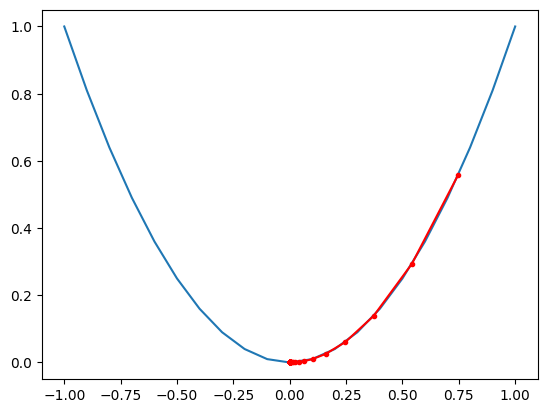

In [44]:
plt.plot(inputs, results)
plt.plot(gd_solutions, gd_scores, '.-', color='r')
plt.show()

### ADAM optimization algorithm

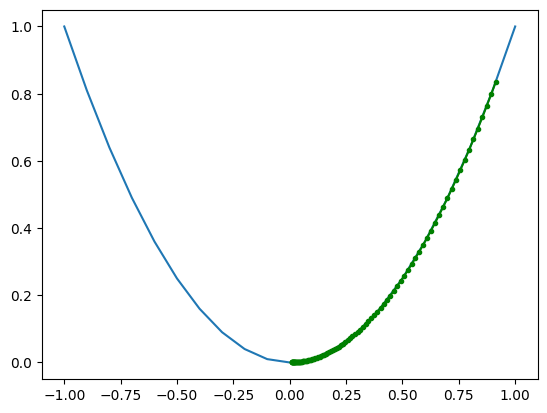

In [45]:
plt.plot(inputs, results)
plt.plot(adam_solutions, adam_scores, '.-', color='g')
plt.show()

# Exercise 4
Write a conclusions about the accuracy of the implemented algorithms.

*Gradient descent with momentum* is a modification of the standard gradient descent algorithm that adds a momentum term. This momentum term helps the algorithm overcome small local optima and accelerates convergence in many cases. But this algorithm might still suffer from slow convergence in certain scenarios or if the momentum parameter is not set correctly. It doesn't adapt the learning rate, which means a fixed learning rate may not be optimal for all parts of the optimization landscape. Gradient descent with momentum can be quite accurate and efficient, particularly when the learning rate and momentum parameters are well-tuned. It performs well in escaping local minima and converging to good solutions.

*Adam* is an adaptive optimization algorithm that dynamically adjusts the learning rate for each parameter. It combines the benefits of both momentum and RMSprop by keeping a running average of both the gradient and its square. But this algorithm can be sensitive to the choice of hyperparameters (e.g., the learning rate, and the beta1 and beta2 parameters) and may require more memory to store the additional moments (m and v). Adam excels in scenarios where the landscape of the optimization problem is complex and has varying curvatures. However, it may not be the best choice for all problems, and its performance can be affected by the choice of hyperparameters.

**Conclusion:**

Both gradient descent with momentum and Adam are accurate optimization algorithms, but their performance depends on the specific characteristics of the optimization problem and the appropriate tuning of hyperparameters. For most machine learning tasks, Adam tends to be a robust choice due to its adaptive learning rate capabilities. Still, it's essential to experiment with different optimization algorithms and hyperparameters to find the one that performs best for a particular problem..